In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

# File to Load (Remember to change the path if needed.)
diabetes = "diabetesDB.csv"

# Read the data and store in Dataframe
df = pd.read_csv(diabetes)
df.shape

(947923, 54)

In [3]:
# Create filtered dataframe for only 2015 Data
df_2015 = df.loc[( df['iyear'] == "b'2015'" )]
df_2015.shape

(430541, 54)

# Exploratory Data Analysis

In [4]:
# Review nulls
df_2015.isnull().sum()

id               0
_state           0
iyear            0
genhlth          2
physhlth         1
menthlth         0
poorhlth    209401
hlthpln1         0
persdoc2         0
medcost          1
checkup1         1
bphigh4          1
toldhi2      57098
cvdinfr4         0
cvdcrhd4         1
cvdstrk3         0
asthma3          0
asthnow     372532
chccopd1         0
havarth3         1
addepev2         0
chckidny         0
diabete3         7
sex              0
marital          0
educa            0
renthom1         0
employ1          0
weight2       5104
height3       5680
smoke100     13686
smokday2    250219
usenow3      14306
avedrnk2    224740
exerany2     34194
scntmny1    363204
scntmel1    359485
adpleasr    410684
addown      410700
adsleep     410710
adenergy    410715
adeat1      410725
adfail      410732
adthink     410745
admove      410761
mistmnt     410775
adanxev     410783
_race            0
_age_g           0
htm4         14880
wtkg3        30083
_bmi5        35347
_frutsum    

In [5]:
# Dataframe info
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430541 entries, 0 to 441456
Data columns (total 54 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        430541 non-null  int64  
 1   _state    430541 non-null  int64  
 2   iyear     430541 non-null  object 
 3   genhlth   430539 non-null  float64
 4   physhlth  430540 non-null  float64
 5   menthlth  430541 non-null  int64  
 6   poorhlth  221140 non-null  float64
 7   hlthpln1  430541 non-null  int64  
 8   persdoc2  430541 non-null  int64  
 9   medcost   430540 non-null  float64
 10  checkup1  430540 non-null  float64
 11  bphigh4   430540 non-null  float64
 12  toldhi2   373443 non-null  float64
 13  cvdinfr4  430541 non-null  float64
 14  cvdcrhd4  430540 non-null  float64
 15  cvdstrk3  430541 non-null  int64  
 16  asthma3   430541 non-null  int64  
 17  asthnow   58009 non-null   float64
 18  chccopd1  430541 non-null  float64
 19  havarth3  430540 non-null  float64
 20  adde

In [6]:
# Descriptive statistics of the data
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
id,947923.0,473962.000000,273641.943946,1.000000e+00,94793.2,236981.5,473962.0,710942.5,853130.8,900526.9,938443.78,947923.0
_state,947923.0,29.841483,15.710905,1.000000e+00,8.0,19.0,29.0,42.0,51.0,54.0,72.00,72.0
genhlth,947918.0,2.593033,1.137522,1.000000e+00,1.0,2.0,3.0,3.0,4.0,5.0,5.00,9.0
physhlth,947921.0,60.619301,37.042413,1.000000e+00,3.0,15.0,88.0,88.0,88.0,88.0,88.00,99.0
menthlth,947923.0,64.382728,35.931689,1.000000e+00,3.0,25.0,88.0,88.0,88.0,88.0,88.00,99.0
poorhlth,491421.0,56.062893,37.988132,1.000000e+00,2.0,12.0,88.0,88.0,88.0,88.0,88.00,99.0
hlthpln1,947923.0,1.120551,0.507192,1.000000e+00,1.0,1.0,1.0,1.0,1.0,2.0,2.00,9.0
persdoc2,947923.0,1.392848,0.818937,1.000000e+00,1.0,1.0,1.0,1.0,3.0,3.0,3.00,9.0
medcost,947922.0,1.900634,0.428288,1.000000e+00,1.0,2.0,2.0,2.0,2.0,2.0,2.00,9.0
checkup1,947922.0,1.602784,1.268393,1.000000e+00,1.0,1.0,1.0,2.0,3.0,4.0,8.00,9.0


In [7]:
# Check if the data set has any null values 
df.isnull().head(10)

,id,_state,iyear,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,...,admove,mistmnt,adanxev,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,True,True
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False


# Data Visualization

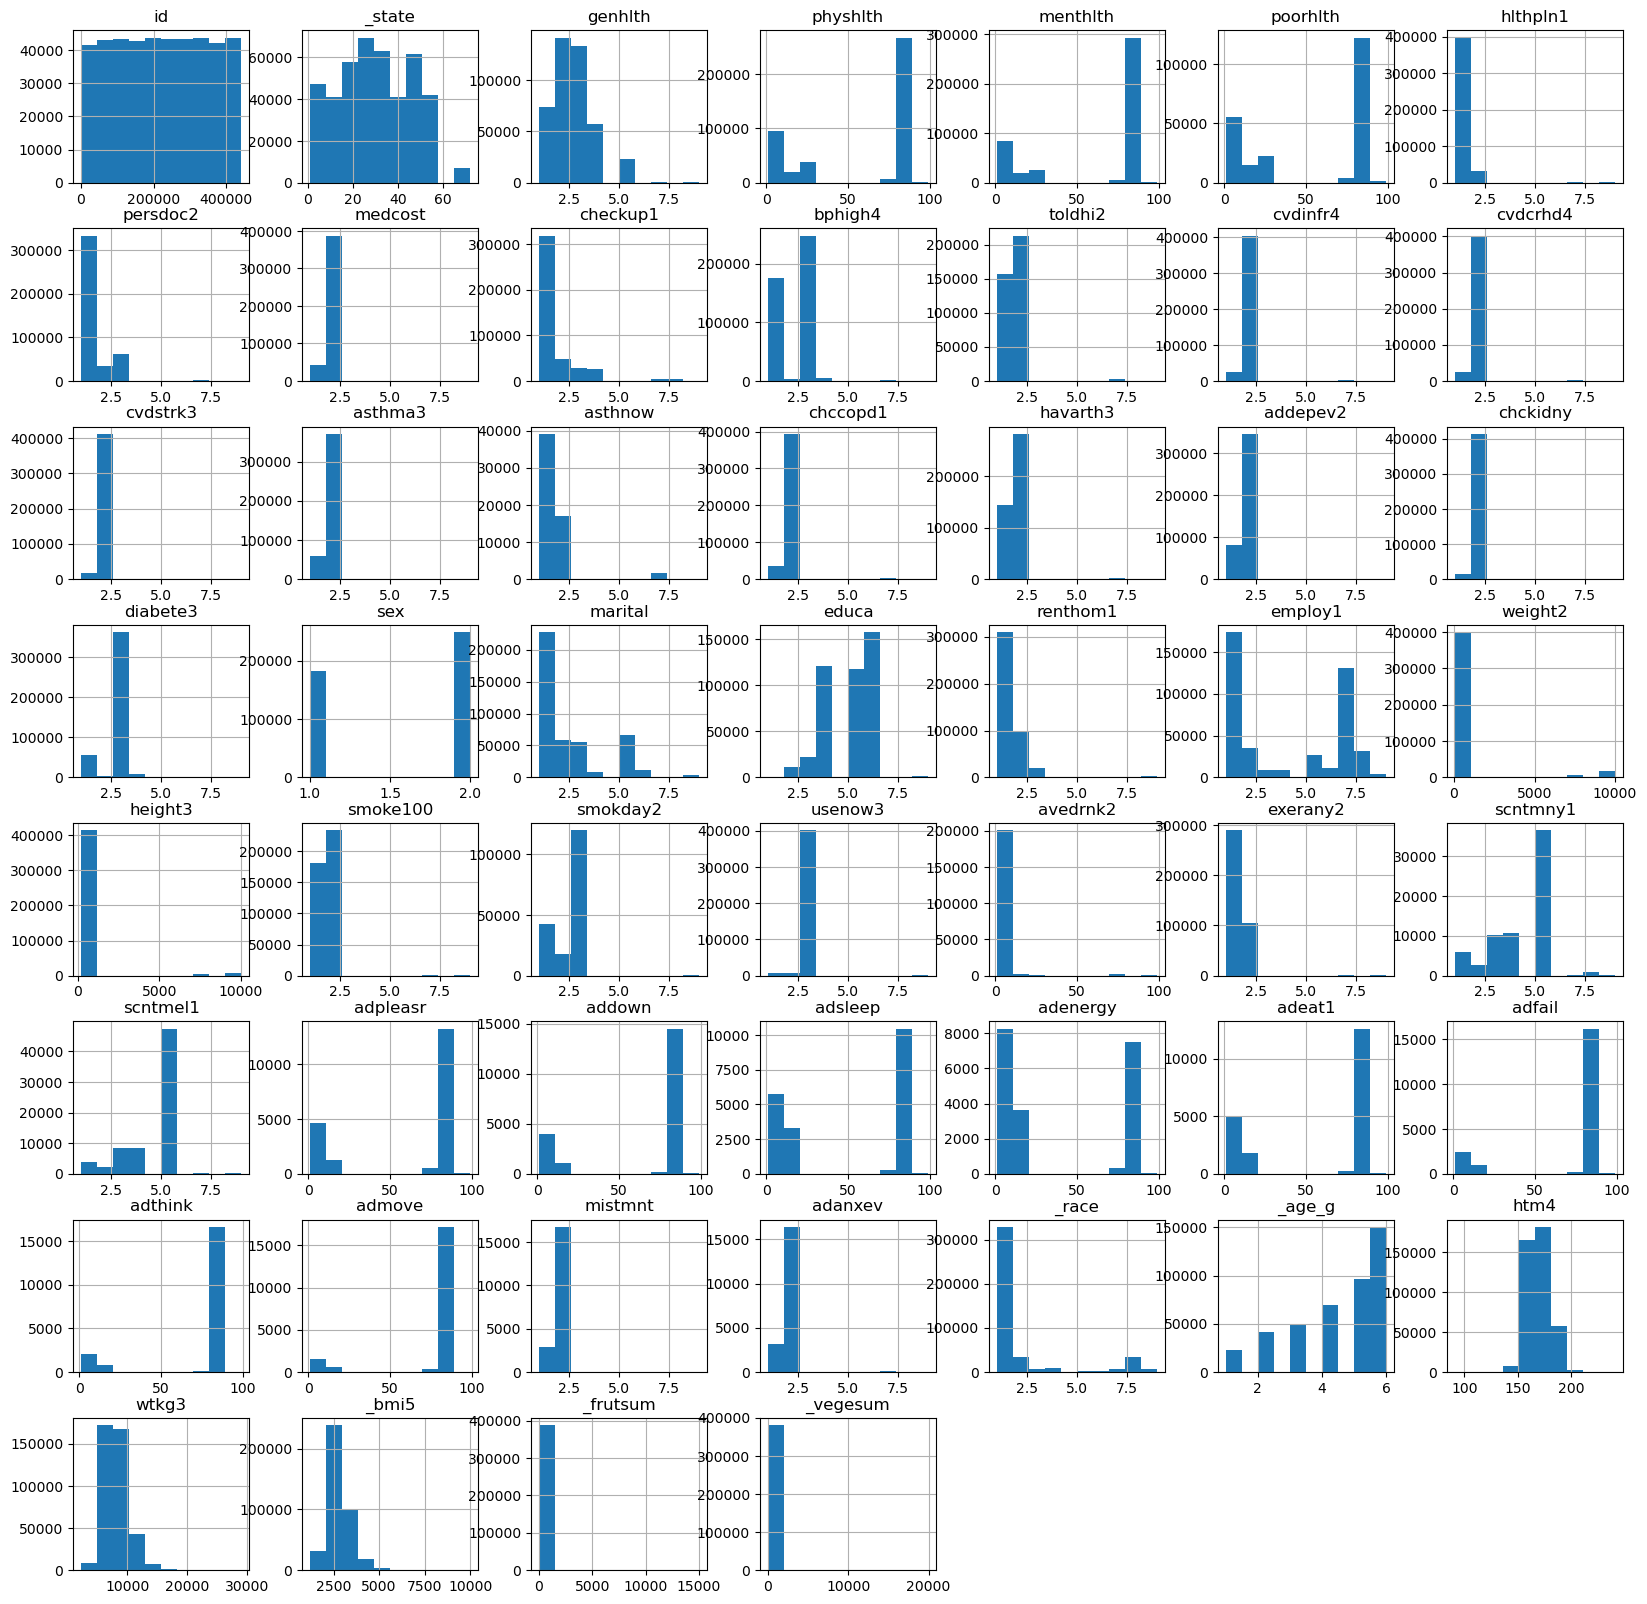

In [8]:
p = df_2015.hist(figsize = (20,20))

In [18]:
# Remove NaN Values from Diabetes (Target)
df_2015['diabete3'].fillna(0, inplace=True)

In [23]:
# Remove NaN Values from all other fields (Features)
df_2015.fillna(100, inplace=True)

In [24]:
df_2015.isnull().sum()

id          0
_state      0
iyear       0
genhlth     0
physhlth    0
menthlth    0
poorhlth    0
hlthpln1    0
persdoc2    0
medcost     0
checkup1    0
bphigh4     0
toldhi2     0
cvdinfr4    0
cvdcrhd4    0
cvdstrk3    0
asthma3     0
asthnow     0
chccopd1    0
havarth3    0
addepev2    0
chckidny    0
diabete3    0
sex         0
marital     0
educa       0
renthom1    0
employ1     0
weight2     0
height3     0
smoke100    0
smokday2    0
usenow3     0
avedrnk2    0
exerany2    0
scntmny1    0
scntmel1    0
adpleasr    0
addown      0
adsleep     0
adenergy    0
adeat1      0
adfail      0
adthink     0
admove      0
mistmnt     0
adanxev     0
_race       0
_age_g      0
htm4        0
wtkg3       0
_bmi5       0
_frutsum    0
_vegesum    0
dtype: int64